1)https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

2)https://github.com/christianversloot/machine-learning-articles/blob/main/creating-a-multilabel-neural-network-classifier-with-tensorflow-and-keras.md

3)https://www.geeksforgeeks.org/an-introduction-to-multilabel-classification/

4)https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/

5)https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

6)https://www.kaggle.com/code/albeffe/text-clustering-tfidf-pca-beginner-tutorial

#Pre-Processing and Loading Of Data

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/sanquaorg/ML-Project/main/n_movies.csv")
df

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


In [ ]:
x=df["title"]
y=df["genre"]
z=df["description"]

In [ ]:
df=pd.DataFrame(list(zip(x,y,z)),columns=["Movie","Genre","Plot"])
df

,Movie,Genre,Plot
0,Cobra Kai,"Action, Comedy, Drama",Decades after their 1984 All Valley Karate Tou...
1,The Crown,"Biography, Drama, History",Follows the political rivalries and romance of...
2,Better Call Saul,"Crime, Drama",The trials and tribulations of criminal lawyer...
3,Devil in Ohio,"Drama, Horror, Mystery",When a psychiatrist shelters a mysterious cult...
4,Cyberpunk: Edgerunners,"Animation, Action, Adventure",A Street Kid trying to survive in a technology...
...,...,...,...
9952,The Imperfects,"Action, Adventure, Drama",After an experimental gene therapy turns them ...
9953,The Walking Dead,"Drama, Horror, Thriller",Sheriff Deputy Rick Grimes wakes up from a com...
9954,The Crown,"Biography, Drama, History",Follows the political rivalries and romance of...
9955,Supernatural,"Drama, Fantasy, Horror",Two brothers follow their father's footsteps a...


In [ ]:
# df.isna().sum()
df=df.dropna()

In [ ]:
df=df.assign(Genre=df.Genre.str.split(","))
df

,Movie,Genre,Plot
0,Cobra Kai,"[Action, Comedy, Drama]",Decades after their 1984 All Valley Karate Tou...
1,The Crown,"[Biography, Drama, History]",Follows the political rivalries and romance of...
2,Better Call Saul,"[Crime, Drama]",The trials and tribulations of criminal lawyer...
3,Devil in Ohio,"[Drama, Horror, Mystery]",When a psychiatrist shelters a mysterious cult...
4,Cyberpunk: Edgerunners,"[Animation, Action, Adventure]",A Street Kid trying to survive in a technology...
...,...,...,...
9952,The Imperfects,"[Action, Adventure, Drama]",After an experimental gene therapy turns them ...
9953,The Walking Dead,"[Drama, Horror, Thriller]",Sheriff Deputy Rick Grimes wakes up from a com...
9954,The Crown,"[Biography, Drama, History]",Follows the political rivalries and romance of...
9955,Supernatural,"[Drama, Fantasy, Horror]",Two brothers follow their father's footsteps a...


In [ ]:
total_genre = sum(df["Genre"],[])
len(set(total_genre))

53

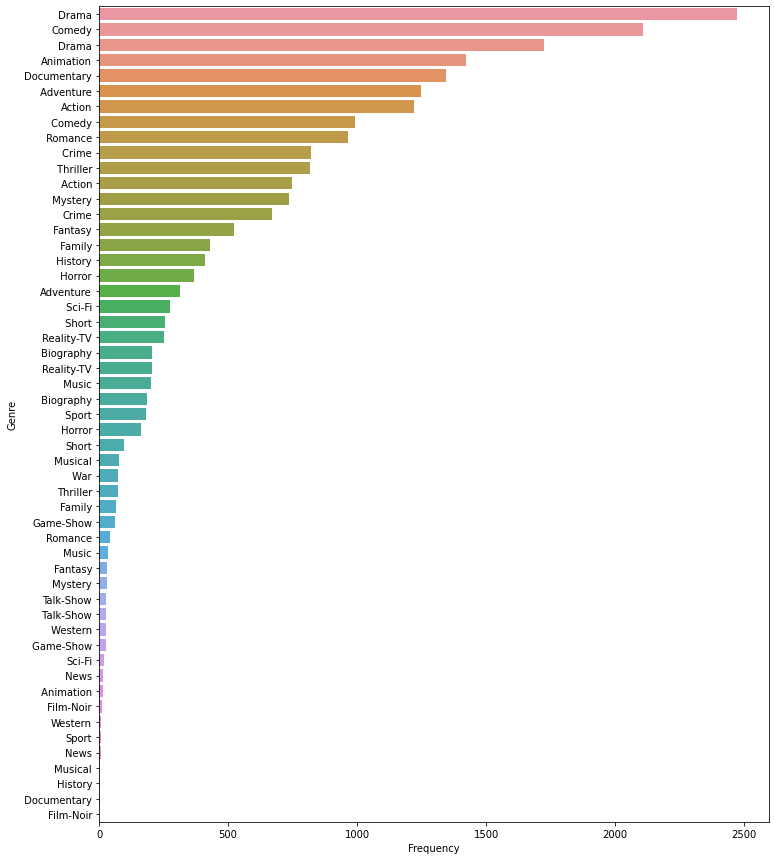

In [ ]:
import nltk
freq = nltk.FreqDist(total_genre)
# print(freq)
freq_df = pd.DataFrame({
    "Genre":list(freq.keys()),
    "Frequency":list(freq.values())
})

plt.figure(figsize=(12,15)) 
g = freq_df.nlargest(columns="Frequency", n = 53)
ax = sns.barplot(data=g, x= "Frequency", y = "Genre") 
ax.set(xlabel = 'Frequency') 
ax.set(ylabel = 'Genre') 
plt.show()


#Data Preprocessing

1)Removing Punctuation

In [ ]:
import string
string.punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['Plot']= df['Plot'].apply(lambda x:remove_punctuation(x))
df

,Movie,Genre,Plot
0,Cobra Kai,"[Action, Comedy, Drama]",Decades after their 1984 All Valley Karate Tou...
1,The Crown,"[Biography, Drama, History]",Follows the political rivalries and romance of...
2,Better Call Saul,"[Crime, Drama]",The trials and tribulations of criminal lawyer...
3,Devil in Ohio,"[Drama, Horror, Mystery]",When a psychiatrist shelters a mysterious cult...
4,Cyberpunk: Edgerunners,"[Animation, Action, Adventure]",A Street Kid trying to survive in a technology...
...,...,...,...
9952,The Imperfects,"[Action, Adventure, Drama]",After an experimental gene therapy turns them ...
9953,The Walking Dead,"[Drama, Horror, Thriller]",Sheriff Deputy Rick Grimes wakes up from a com...
9954,The Crown,"[Biography, Drama, History]",Follows the political rivalries and romance of...
9955,Supernatural,"[Drama, Fantasy, Horror]",Two brothers follow their fathers footsteps as...


2)Converting Text to lowercase and other text cleaning

In [ ]:
import re
def text_clean(text):
  text = re.sub("'\'"," ",text)  #Remove forward slashes
  text = re.sub("[^A-Za-z]"," ",text) #Remove everything except letters
  text=text.lower()
  
  return text

df["Plot"]=df["Plot"].apply(lambda x:text_clean(x))
df

,Movie,Genre,Plot
0,Cobra Kai,"[Action, Comedy, Drama]",decades after their all valley karate tou...
1,The Crown,"[Biography, Drama, History]",follows the political rivalries and romance of...
2,Better Call Saul,"[Crime, Drama]",the trials and tribulations of criminal lawyer...
3,Devil in Ohio,"[Drama, Horror, Mystery]",when a psychiatrist shelters a mysterious cult...
4,Cyberpunk: Edgerunners,"[Animation, Action, Adventure]",a street kid trying to survive in a technology...
...,...,...,...
9952,The Imperfects,"[Action, Adventure, Drama]",after an experimental gene therapy turns them ...
9953,The Walking Dead,"[Drama, Horror, Thriller]",sheriff deputy rick grimes wakes up from a com...
9954,The Crown,"[Biography, Drama, History]",follows the political rivalries and romance of...
9955,Supernatural,"[Drama, Fantasy, Horror]",two brothers follow their fathers footsteps as...


4)Removing Stopwords

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
  output = [i for i in text.split() if i not in stopwords]
  return ' '.join(output)
df["Plot"] = df["Plot"].apply(lambda x:remove_stopwords(x))
df

,Movie,Genre,Plot
0,Cobra Kai,"[Action, Comedy, Drama]",decades valley karate tournament bout middleag...
1,The Crown,"[Biography, Drama, History]",follows political rivalries romance queen eliz...
2,Better Call Saul,"[Crime, Drama]",trials tribulations criminal lawyer jimmy mcgi...
3,Devil in Ohio,"[Drama, Horror, Mystery]",psychiatrist shelters mysterious cult escapee ...
4,Cyberpunk: Edgerunners,"[Animation, Action, Adventure]",street kid trying survive technology body modi...
...,...,...,...
9952,The Imperfects,"[Action, Adventure, Drama]",experimental gene therapy turns monsters three...
9953,The Walking Dead,"[Drama, Horror, Thriller]",sheriff deputy rick grimes wakes coma learn wo...
9954,The Crown,"[Biography, Drama, History]",follows political rivalries romance queen eliz...
9955,Supernatural,"[Drama, Fantasy, Horror]",two brothers follow fathers footsteps hunters ...


5)Using MultilabelBinarizer,convert text to features

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df["Genre"])
y = multilabel_binarizer.transform(df["Genre"])
df["transformed"]=y.tolist()
df

,Movie,Genre,Plot,transformed
0,Cobra Kai,"[Action, Comedy, Drama]",decades valley karate tournament bout middleag...,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,The Crown,"[Biography, Drama, History]",follows political rivalries romance queen eliz...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ..."
2,Better Call Saul,"[Crime, Drama]",trials tribulations criminal lawyer jimmy mcgi...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
3,Devil in Ohio,"[Drama, Horror, Mystery]",psychiatrist shelters mysterious cult escapee ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
4,Cyberpunk: Edgerunners,"[Animation, Action, Adventure]",street kid trying survive technology body modi...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
9952,The Imperfects,"[Action, Adventure, Drama]",experimental gene therapy turns monsters three...,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
9953,The Walking Dead,"[Drama, Horror, Thriller]",sheriff deputy rick grimes wakes coma learn wo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
9954,The Crown,"[Biography, Drama, History]",follows political rivalries romance queen eliz...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ..."
9955,Supernatural,"[Drama, Fantasy, Horror]",two brothers follow fathers footsteps hunters ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ..."


In [ ]:
df_new=df.copy()


6)Extracting Features using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tfidf_vectorizer = TfidfVectorizer(max_df=0.8,max_features=10000)
xtrain,xval,ytrain,yval=train_test_split(df["Plot"],y,test_size=0.2,random_state=9)
xtrain_tfidf=tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf=tfidf_vectorizer.transform(xval)



#LOGISTIC REGRESSION CLASSIFIER

In [ ]:
before_tuning = []
after_tuning =[]
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)


clf.fit(xtrain_tfidf,ytrain)
y_pred = clf.predict(xval_tfidf)


for i in np.arange(0,len(y_pred)):
  print(multilabel_binarizer.inverse_transform(y_pred)[i])
f1_log=f1_score(yval, y_pred, average="micro")
print(f1_log)
before_tuning.append(["Logistic Regression",f1_log])



()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
('Documentary',)
()
()
()
()
()
()
()
()
()
()
()
(' Romance',)
('Action',)
()
()
()
()
()
()
()
()
()
()
('Drama',)
()
()
()
()
()
()
()
(' Drama',)
('Drama',)
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
('Documentary',)
()
()
()
()
()
(' Drama',)
()
()
()
()
()
()
()
()
('Drama',)
()
()
()
(' Drama', ' Thriller', 'Crime')
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
('Action',)
()
()
()
()
()
()
()
()
('Animation',)
()
()
()
(' Adventure', 'Animation')
()
()
()
(' Drama',)
()
()
()
()
()
()
()
()
()
('Documentary',)
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
('Comedy',)
()
()
()
()
()
()
()
()
(' Drama',)
()
()
()
()
()
()
()
()
(' Drama',)
()
()
('Comedy',)
()
()
()
()
()
()
()
()
(' Drama',)
()
()
()
()
()
()
()
()
()
()
(' Action', ' Adventure', 'Animation')
()
()
()
()
(' Drama',)
()
()
()
()
()
()
('Action',)
()
(' Comedy', ' Reality-TV')
()
()
()
(' Come

*HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION*

In [ ]:
y_pred_prob = clf.predict_proba(xval_tfidf)
y_pred_arr=[]
# t = 0.3 # threshold value
for i in range(1,10):
  i=float(i/10)
  y_pred_new = (y_pred_prob >= i).astype(int)
  f1_tune_log=f1_score(yval, y_pred_new, average="micro")
  y_pred_arr.append(f1_tune_log)
  print(f1_tune_log)
  
after_tuning.append(["Tune Logistic Regression",max(y_pred_arr)])
print("Best F1_score is",max(y_pred_arr))


0.38233173076923077
0.4443190793185152
0.3486473507283496
0.2131589072720277
0.12183378689554113
0.06781134535970441
0.03453619659065752
0.013007400762502803
0.0013537906137184117
Best F1_score is 0.4443190793185152


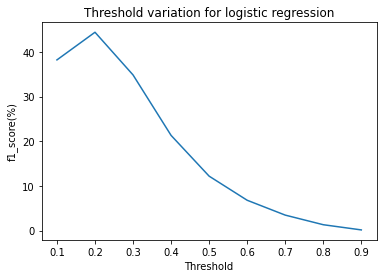

In [ ]:
list_of_num=[]
for i in range(len(y_pred_arr)):
  list_of_num.append((i+1)/10)
  y_pred_arr[i]=y_pred_arr[i]*100
plt.title("Threshold variation for logistic regression")
plt.xlabel("Threshold")
plt.ylabel("f1_score(%)")
plt.plot(list_of_num,y_pred_arr)


#NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
NB_pipeline=Pipeline([('clf',MultiOutputClassifier(MultinomialNB(fit_prior=True,class_prior=None)))])
NB_pipeline.fit(xtrain_tfidf,ytrain)
prediction=NB_pipeline.predict(xval_tfidf)
for i in np.arange(0,len(prediction)):
  print(multilabel_binarizer.inverse_transform(prediction)[i])
f1_score(yval, prediction, average="micro")

#Support Vector Machines - SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
svc=SVC()
ovsr = MultiOutputClassifier(svc)
ovsr.fit(xtrain_tfidf,ytrain)
prediction=ovsr.predict(xval_tfidf)
for i in np.arange(0,len(prediction)):
  print(multilabel_binarizer.inverse_transform(prediction)[i])
svm_f1=f1_score(yval, prediction, average="micro")
before_tuning.append(["SVM",svm_f1])


()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
('Documentary',)
()
()
()
()
()
()
()
()
()
()
()
(' Romance',)
('Action',)
()
('Documentary',)
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(' Drama',)
(' History', 'Drama')
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
('Documentary',)
()
()
()
()
()
(' Drama',)
()
()
()
()
()
()
()
()
()
()
()
()
(' Drama',)
()
()
()
()
()
('Documentary',)
(' Drama', 'Comedy')
()
()
()
()
()
()
()
()
()
()
('Action',)
()
()
()
()
()
()
()
()
('Animation',)
()
()
()
(' Action', ' Adventure', 'Animation')
()
()
()
()
()
()
()
()
()
()
()
()
()
('Documentary',)
()
(' Action', ' Adventure', 'Animation')
()
()
()
()
()
()
()
()
()
('Animation',)
()
('Documentary',)
()
()
()
()
(' Adventure',)
()
()
(' Romance',)
()
()
()
()
()
()
()
()
()
()
('Animation',)
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(' Drama', ' Mystery', 'Crime')
()
()
('Comedy',)
()
()
()
()
()
()
()
()
()
(' Action', ' Adventure', 'Animation')
()
()
()
()
()
()

In [ ]:
y_pred_arr_svm=[]
for i in range(100):
  svc=SVC(C=i+1)
  ovsr = MultiOutputClassifier(svc)
  ovsr.fit(xtrain_tfidf,ytrain)
  prediction=ovsr.predict(xval_tfidf)
  svm_f1_tune=f1_score(yval, prediction, average="micro")
  y_pred_arr_svm.append(svm_f1_tune)
print("Best F1 Score:",max(y_pred_arr_svm))
after_tuning.append(["SVM tune",max(y_pred_arr_svm)])



#KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
neigh=MultiOutputClassifier( KNeighborsClassifier(n_neighbors=3))
neigh.fit(xtrain_tfidf,ytrain)
prediction=neigh.predict(xval_tfidf)
for i in np.arange(0,len(prediction)):
  print(multilabel_binarizer.inverse_transform(prediction)[i])
f1_knn=f1_score(yval, prediction, average="micro")
print(f1_knn)
before_tuning.append(["KNN",f1_knn])

('Drama',)
()
(' Drama', 'Comedy')
()
()
(' Adventure',)
('Animation',)
()
()
(' Biography', ' Drama', 'Documentary')
(' Romance',)
()
('Documentary',)
()
(' Adventure', ' Comedy', 'Animation')
(' Action', ' Adventure')
(' Romance', 'Drama')
()
()
()
(' Drama', ' Horror', 'Action')
(' Drama',)
(' Comedy', ' Romance', 'Animation')
()
()
('Drama',)
('Comedy',)
()
(' Romance',)
(' Romance', 'Comedy')
(' Crime', 'Action')
('Documentary',)
(' History', 'Drama')
()
()
()
()
(' History', ' Romance', 'Drama')
(' Action', ' Adventure', 'Animation')
('Documentary',)
('Drama',)
()
(' Drama',)
(' Drama', 'Action')
()
(' Drama',)
(' Drama', ' Romance', 'Comedy')
(' Drama',)
(' Drama',)
(' Comedy', ' Drama', 'Action')
(' History', 'Drama')
(' Romance', 'Drama')
('Comedy',)
()
(' Fantasy', ' Thriller', 'Drama')
()
()
('Short',)
(' Action', ' Adventure', 'Animation')
('Comedy',)
()
()
(' Drama',)
()
()
('Drama',)
('Drama',)
(' Short', 'Documentary')
(' Short', 'Documentary')
()
(' Action', ' Adventure

In [ ]:
before_tuning

[['Logistic Regression', 0.12183378689554113], ['KNN', 0.380500814935546]]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
leaf_size=list(range(1,20))
n_neighbors=list(range(1,20))
p=[1,2]
hyperparameters=dict(estimator__leaf_size=leaf_size,estimator__n_neighbors=n_neighbors,estimator__p=p)
neigh1=MultiOutputClassifier(KNeighborsClassifier())
clf=GridSearchCV(neigh1,hyperparameters,cv=10)
# print(clf)
best=clf.fit(xtrain_tfidf,ytrain)
print('Best leaf_size:', best.best_estimator_.get_params()['leaf_size'])
print('Best p:', best.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best.best_estimator_.get_params()['n_neighbors'])
# prediction=neigh.predict(xval_tfidf)
# for i in np.arange(0,len(prediction)):
#   print(multilabel_binarizer.inverse_transform(prediction)[i])
# f1_score(yval, prediction, average="micro")

*HYPERPARAMETER TUNING FOR KNN CLASSFIER*

In [ ]:
y_pred_arr_knn=[]
for i in range(10):
  neigh=MultiOutputClassifier( KNeighborsClassifier(n_neighbors=i+1))
  neigh.fit(xtrain_tfidf,ytrain)
  prediction_knn_tune=neigh.predict(xval_tfidf)
  f1_tune_knn=f1_score(yval, prediction_knn_tune, average="micro")
  print(f1_tune_knn)
  y_pred_arr_knn.append(f1_tune_knn)
after_tuning.append(["Tune KNN",max(y_pred_arr_knn)])
print("Best F1_score is",max(y_pred_arr_knn))

0.3591992802519119
0.3081772018910874
0.380500814935546
0.288961038961039
0.34958813838550246
0.27367248421834384
0.30920590302178497
0.252715837621498
0.28503476033662645
0.2276359384135646
Best F1_score is 0.380500814935546


In [ ]:
after_tuning

[['Tune Logistic Regression', 0.4443190793185152],
 ['Tune KNN', 0.380500814935546]]

#DECISION TREE CLASSIFIER

In [ ]:
from sklearn import tree
from sklearn.multioutput import MultiOutputClassifier
dtc=MultiOutputClassifier( tree.DecisionTreeClassifier(criterion="entropy"))
dtc.fit(xtrain_tfidf,ytrain)
prediction=dtc.predict(xval_tfidf)
for i in np.arange(0,len(prediction)):
  print(multilabel_binarizer.inverse_transform(prediction)[i])
dt_f1=f1_score(yval, prediction, average="micro")
print(dt_f1)
before_tuning.append(["Decision Tree",dt_f1])


('Action',)
(' Adventure', ' Comedy', 'Animation')
(' Comedy', ' Mystery')
('Documentary',)
('Action', 'Drama')
('Biography',)
(' Adventure', ' Family', 'Animation', 'Documentary')
(' Drama', 'Action', 'Drama')
(' Thriller', 'Action')
(' Adventure', ' Drama')
(' Drama',)
(' Music', 'Drama')
('Documentary',)
()
()
(' Family', ' Fantasy')
()
('Documentary',)
('Documentary',)
()
(' Crime', ' Thriller', 'Action', 'Comedy')
(' Drama', 'Documentary', 'Mystery')
(' Romance',)
(' Family',)
('Animation',)
()
(' Drama', 'Documentary')
()
(' Romance', 'Comedy')
(' Romance', 'Comedy')
(' Horror', ' Thriller', 'Action')
(' Fantasy', ' Mystery', ' Sport')
(' History', 'Documentary')
(' Drama', ' Mystery')
(' Comedy', ' Thriller')
()
()
('Documentary',)
(' Adventure', ' Family', 'Animation', 'Documentary')
('Drama',)
('Drama',)
('Drama',)
(' Animation', ' Fantasy', 'Animation')
(' Family',)
(' Romance',)
('Comedy', 'Documentary')
(' Drama', 'Comedy')
(' Adventure', 'Animation')
('Comedy',)
()
(' Hist

*HYPERPARAMETER TUNING FOR DECISION TREE CLASSFIER*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
y_pred_arr_dt=[]
for i in range(10,40):
  model=MultiOutputClassifier(DecisionTreeClassifier(max_depth=i,random_state=42))
  model.fit(xtrain_tfidf,ytrain)
  prediction_dt_tune=model.predict(xval_tfidf)
  f1_tune_dt=f1_score(yval, prediction_dt_tune, average="micro")
  y_pred_arr_dt.append(f1_tune_dt)
  
  print('')

print("---------------------")
for i in range(10,40):
  model=MultiOutputClassifier(DecisionTreeClassifier(max_depth=35,max_leaf_nodes=i,random_state=42))
  model.fit(xtrain_tfidf,ytrain)
  prediction=model.predict(xval_tfidf)
  print(f1_score(yval, prediction, average="micro"))
  print('')

after_tuning.append(["Tune dt",max(y_pred_arr_dt)])
print("Best F1_score is",max(y_pred_arr_dt))































---------------------
0.2174815933547291

0.22280471821756223

0.23068350668647844

0.23616236162361626

0.24355458036204056

0.24818313953488372

0.2534703443302686

0.2543497757847533

0.2585470085470085

0.2598829994681794

0.26666666666666666

0.26983572177560294

0.2733286908077995

0.2773065604985287

0.2795031055900621

0.28021316829981086

0.28140531276778064

0.2837653478854025

0.2858115005103777

0.28929115208932504

0.29068197164078324

0.29124579124579125

0.2910924369747899

0.29198793161247066

0.29262595929262597

0.2933732933732934

0.2952396749046276

0.296957671957672

0.2970787258623535

0.2956493078444298

Best F1_score is 0.3119611224329832


In [ ]:
before_tuning

[['Logistic Regression', 0.12183378689554113],
 ['KNN', 0.380500814935546],
 ['Decision Tree', 0.32823470411233696]]

In [ ]:
after_tuning

[['Tune Logistic Regression', 0.4443190793185152],
 ['Tune KNN', 0.380500814935546],
 ['Tune dt', 0.3119611224329832]]

#ADABOOST CLASSIFIER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multioutput import MultiOutputClassifier
rfc=MultiOutputClassifier( AdaBoostClassifier(n_estimators=100,random_state=0))
rfc.fit(xtrain_tfidf,ytrain)
prediction=rfc.predict(xval_tfidf)
for i in np.arange(0,len(prediction)):
  print(multilabel_binarizer.inverse_transform(prediction)[i])
ada_f1=f1_score(yval, prediction, average="micro")
print(ada_f1)
before_tuning.append(["Adaboost",ada_f1])

()
()
()
()
()
()
(' Adventure', 'Animation')
(' Drama', ' Romance')
(' Crime',)
()
(' Comedy', 'Animation', 'Drama')
(' Action', ' Music', ' Mystery', 'Drama', 'Music')
('Reality-TV',)
()
()
(' Family',)
('Drama',)
('Documentary',)
('Action',)
()
(' Action', ' History', ' War', 'Action')
(' Fantasy', 'Adventure')
(' Mystery',)
(' Romance', 'Reality-TV')
('Documentary',)
()
()
('Biography',)
()
(' Romance',)
()
()
(' History',)
()
('Comedy',)
(' Drama',)
()
(' Drama', ' History')
('Animation',)
()
(' Drama',)
('Drama',)
('Drama',)
()
()
()
()
('Animation',)
()
()
(' History', 'Drama')
('Drama',)
('Comedy',)
()
()
()
()
()
()
('Drama',)
(' Crime',)
(' Drama',)
(' Adventure',)
()
(' Adventure', ' Sci-Fi', 'Animation', 'Documentary')
()
(' Adventure',)
('Documentary',)
(' Documentary', 'Documentary')
()
('Comedy',)
()
(' Music',)
()
()
()
(' Music',)
()
(' Action',)
('Drama',)
()
('Animation', 'Documentary')
('Drama',)
()
(' Romance',)
(' Music', 'Drama')
(' Drama', ' Musical', ' Thriller

In [ ]:
y_pred_arr_ada=[]
for i in range(50,100):
  rfc=MultiOutputClassifier( AdaBoostClassifier(n_estimators=100,random_state=0))
  rfc.fit(xtrain_tfidf,ytrain)
  prediction=rfc.predict(xval_tfidf)
  ada_f1_tune=f1_score(yval, prediction, average="micro")
  y_pred_arr_ada.append(ada_f1_tune)
after_tuning.append(["Adaboost tuning",max(y_pred_arr_ada)])
print("Best F1_score is",max(y_pred_arr_ada))


#DEEP LEARNING MODELS

In [ ]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# Configuration options
n_samples = 10000
n_features = 10000
n_classes = 53
n_labels = 2
n_epochs = 50
random_state = 42
batch_size = 250
verbosity = 1
validation_split = 0.2
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=n_features))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(n_classes, activation='sigmoid'))

model.compile(loss=binary_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])


model.fit(xtrain_tfidf.toarray(), ytrain,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=verbosity,
          validation_split=validation_split)

score = model.evaluate(xval_tfidf.toarray(), yval, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

#Comparing the Models before tuning and after tuning

In [ ]:
df = pd.DataFrame(before_tuning, columns = ['Name', 'F1_Score'])
print(df )

                  Name  F1_Score
0  Logistic Regression  0.121834
1                  KNN  0.380501
2        Decision Tree  0.328235
3                  SVM  0.150912
4             Adaboost  0.322390


In [ ]:
after_tuning.append(["Tune Adaboost",0.345632])
after_tuning.append(["SVM",0.203432])


In [ ]:
after_tuning.pop(4)

['Tune Adaboost', 0.345632]

In [ ]:
df1 = pd.DataFrame(after_tuning, columns = ['Name', 'F1_Score'])

print(df1)

                       Name  F1_Score
0  Tune Logistic Regression  0.444319
1                  Tune KNN  0.380501
2                   Tune dt  0.311961
3             Tune Adaboost  0.345632
4                       SVM  0.203432


In [ ]:
p=np.arange(len(df["Name"]))
p1=[j+0.2 for j in p]

<ipython-input-58-eeb957e14735>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at[i]=at[i]*100
<ipython-input-58-eeb957e14735>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt[i]=bt[i]*100


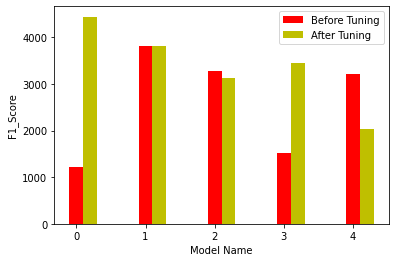

In [ ]:
list_of_num_x=[]
bt=df["F1_Score"]
at=df1["F1_Score"]
for i in range(len(at)):
  list_of_num_x.append((i+1)/10)
  at[i]=at[i]*100
for i in range(len(bt)):
  list_of_num_x.append((i+1)/10)
  bt[i]=bt[i]*100
plt.bar(p,bt,0.2,color="r",label="Before Tuning")
plt.bar(p1,at,0.2,color="y",label="After Tuning")
plt.xlabel("Model Name")
plt.ylabel("F1_Score")
plt.legend()
plt.show()

#PRINCIPAL COMPONENT ANALYSIS

In [ ]:
df_new

,Movie,Genre,Plot,transformed
0,Cobra Kai,"[Action, Comedy, Drama]",decades valley karate tournament bout middleag...,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,The Crown,"[Biography, Drama, History]",follows political rivalries romance queen eliz...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ..."
2,Better Call Saul,"[Crime, Drama]",trials tribulations criminal lawyer jimmy mcgi...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
3,Devil in Ohio,"[Drama, Horror, Mystery]",psychiatrist shelters mysterious cult escapee ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
4,Cyberpunk: Edgerunners,"[Animation, Action, Adventure]",street kid trying survive technology body modi...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
9952,The Imperfects,"[Action, Adventure, Drama]",experimental gene therapy turns monsters three...,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
9953,The Walking Dead,"[Drama, Horror, Thriller]",sheriff deputy rick grimes wakes coma learn wo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
9954,The Crown,"[Biography, Drama, History]",follows political rivalries romance queen eliz...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ..."
9955,Supernatural,"[Drama, Fantasy, Horror]",two brothers follow fathers footsteps hunters ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ..."


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_new["Plot"])
y_new = multilabel_binarizer.transform(df_new["Plot"])
df_new["transformed_plot"]=y_new.tolist()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tfidf_vectorizer = TfidfVectorizer(max_df=0.8,max_features=10000)

xtrain_tfidf_new=tfidf_vectorizer.fit_transform(df_new["Plot"])
# xval_tfidf=tfidf_vectorizer.transform(xval)
df_new

,Movie,Genre,Plot,transformed,transformed_plot
0,Cobra Kai,"[Action, Comedy, Drama]",decades valley karate tournament bout middleag...,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,The Crown,"[Biography, Drama, History]",follows political rivalries romance queen eliz...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, ..."
2,Better Call Saul,"[Crime, Drama]",trials tribulations criminal lawyer jimmy mcgi...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Devil in Ohio,"[Drama, Horror, Mystery]",psychiatrist shelters mysterious cult escapee ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, ..."
4,Cyberpunk: Edgerunners,"[Animation, Action, Adventure]",street kid trying survive technology body modi...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ..."
...,...,...,...,...,...
9952,The Imperfects,"[Action, Adventure, Drama]",experimental gene therapy turns monsters three...,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ..."
9953,The Walking Dead,"[Drama, Horror, Thriller]",sheriff deputy rick grimes wakes coma learn wo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ..."
9954,The Crown,"[Biography, Drama, History]",follows political rivalries romance queen eliz...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, ..."
9955,Supernatural,"[Drama, Fantasy, Horror]",two brothers follow fathers footsteps hunters ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ..."


In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix


# >>> np.random.seed(0)
# >>> X_dense = np.random.rand(100, 100)
# >>> X_dense[:, 2 * np.arange(50)] = 0
# >>> X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
xtrain_tfidf1=csr_matrix(xtrain_tfidf_new)
svd.fit(xtrain_tfidf1)
correct1=pd.DataFrame()
df_new["pca0"]=svd.fit_transform(xtrain_tfidf1)[:,0]
df_new["pca1"]=svd.fit_transform(xtrain_tfidf1)[:,1]
df_new["pca2"]=svd.fit_transform(xtrain_tfidf1)[:,2]
df_new["pca3"]=svd.fit_transform(xtrain_tfidf1)[:,3]
df_new["pca4"]=svd.fit_transform(xtrain_tfidf1)[:,4]
df_new["pca5"]=svd.fit_transform(xtrain_tfidf1)[:,5]
df_new["pca6"]=svd.fit_transform(xtrain_tfidf1)[:,6]
df_new["pca7"]=svd.fit_transform(xtrain_tfidf1)[:,7]
df_new["pca8"]=svd.fit_transform(xtrain_tfidf1)[:,8]
df_new["pca9"]=svd.fit_transform(xtrain_tfidf1)[:,9]
df_new

,Movie,Genre,Plot,transformed,transformed_plot,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,Cobra Kai,"[Action, Comedy, Drama]",decades valley karate tournament bout middleag...,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000026,0.029079,0.005066,-0.017722,0.018611,-0.017957,-0.012444,-0.016617,0.011827,-0.003548
1,The Crown,"[Biography, Drama, History]",follows political rivalries romance queen eliz...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, ...",0.000115,0.041612,0.006522,-0.022572,-0.013220,0.001138,0.043222,-0.006529,-0.009979,-0.003357
2,Better Call Saul,"[Crime, Drama]",trials tribulations criminal lawyer jimmy mcgi...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000036,0.014971,0.002525,-0.008762,0.001412,0.002783,-0.001147,-0.006941,0.006424,0.007435
3,Devil in Ohio,"[Drama, Horror, Mystery]",psychiatrist shelters mysterious cult escapee ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, ...",0.000138,0.088288,0.016939,-0.061676,-0.016167,0.007246,-0.016846,-0.098297,-0.115113,0.026282
4,Cyberpunk: Edgerunners,"[Animation, Action, Adventure]",street kid trying survive technology body modi...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...",0.000094,0.069078,0.008713,-0.033007,0.023325,0.001843,-0.022369,-0.007149,-0.002358,-0.013687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,"[Action, Adventure, Drama]",experimental gene therapy turns monsters three...,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...",0.000116,0.067740,0.011557,-0.041132,0.045912,-0.029248,0.007856,-0.009304,-0.012064,0.049774
9953,The Walking Dead,"[Drama, Horror, Thriller]",sheriff deputy rick grimes wakes coma learn wo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...",0.000090,0.073363,0.013092,-0.048101,0.062378,-0.034766,0.002573,-0.100909,-0.089280,-0.075819
9954,The Crown,"[Biography, Drama, History]",follows political rivalries romance queen eliz...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, ...",0.000115,0.041612,0.006522,-0.022572,-0.013220,0.001138,0.043222,-0.006529,-0.009979,-0.003357
9955,Supernatural,"[Drama, Fantasy, Horror]",two brothers follow fathers footsteps hunters ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...",0.000089,0.062407,0.009931,-0.035567,0.031101,-0.059337,0.006917,-0.027944,-0.002289,0.040832


In [ ]:
xtrain1=pd.DataFrame()
xtrain1=df_new[["pca0","pca1","pca2","pca3","pca4","pca5","pca6","pca7","pca8","pca9"]]
xtrain1


,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,0.000026,0.029079,0.005066,-0.017722,0.018611,-0.017957,-0.012444,-0.016617,0.011827,-0.003548
1,0.000115,0.041612,0.006522,-0.022572,-0.013220,0.001138,0.043222,-0.006529,-0.009979,-0.003357
2,0.000036,0.014971,0.002525,-0.008762,0.001412,0.002783,-0.001147,-0.006941,0.006424,0.007435
3,0.000138,0.088288,0.016939,-0.061676,-0.016167,0.007246,-0.016846,-0.098297,-0.115113,0.026282
4,0.000094,0.069078,0.008713,-0.033007,0.023325,0.001843,-0.022369,-0.007149,-0.002358,-0.013687
...,...,...,...,...,...,...,...,...,...,...
9952,0.000116,0.067740,0.011557,-0.041132,0.045912,-0.029248,0.007856,-0.009304,-0.012064,0.049774
9953,0.000090,0.073363,0.013092,-0.048101,0.062378,-0.034766,0.002573,-0.100909,-0.089280,-0.075819
9954,0.000115,0.041612,0.006522,-0.022572,-0.013220,0.001138,0.043222,-0.006529,-0.009979,-0.003357
9955,0.000089,0.062407,0.009931,-0.035567,0.031101,-0.059337,0.006917,-0.027944,-0.002289,0.040832
